In [1]:
import os,codecs
import numpy as np

path='/Users/gindu/Desktop/mnist_dataset/'
files=os.listdir(path)

def get_int(b):
    return int(codecs.encode(b, 'hex'), 16)

data_dict={}
for file in files:
    print("Reading ",file)
    with open (path+file,'rb') as f:
        data = f.read()
        type = get_int(data[:4])   
        length = get_int(data[4:8])
        if (type == 2051):
            category = 'images'
            num_rows = get_int(data[8:12])  
            num_cols = get_int(data[12:16])
            parsed = np.frombuffer(data,dtype = np.uint8, offset = 16)
            parsed = parsed.reshape(length,num_rows,num_cols)  
        elif(type == 2049):
            category = 'labels'
            parsed = np.frombuffer(data, dtype=np.uint8, offset=8)
            parsed = parsed.reshape(length)                          
        if (length==20800):
            set = 'test'
        elif (length==124800):
            set = 'train'
        data_dict[set+'_'+category] = parsed

Reading  emnist-letters-test-images-idx3-ubyte
Reading  emnist-letters-test-labels-idx1-ubyte
Reading  clf_train.pkl
Reading  emnist-letters-train-images-idx3-ubyte
Reading  MNISTData.pkl
Reading  emnist-letters-train-labels-idx1-ubyte


In [2]:
data_dict.keys()

dict_keys(['test_images', 'test_labels', 'train_images', 'train_labels'])

In [3]:
x_train=data_dict['train_images']
y_train=data_dict['train_labels']
x_test=data_dict['test_images']
y_test=data_dict['test_labels']


In [4]:
labels=' ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

import matplotlib.pyplot as plt
plt.gray() 
imgplot = plt.imshow(x_train[20].T, cmap='gray')
print("label: ",y_train[20])
plt.show()
print(labels[y_train[20]])

label:  2


<Figure size 640x480 with 1 Axes>

B


In [5]:
print(x_train.shape,x_test.shape)

(124800, 28, 28) (20800, 28, 28)


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [8]:
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)

x_train shape: (124800, 28, 28, 1)


In [9]:
import tensorflow as tf

In [10]:
import sys

sys.path

sys.executable

'/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7'

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [22]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(27,activation=tf.nn.softmax))

In [25]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10, batch_size=1000)

Epoch 1/10
124800/124800 [==============================] - 57s 454us/step - loss: 0.1838 - acc: 0.9356
Epoch 2/10
124800/124800 [==============================] - 55s 444us/step - loss: 0.1651 - acc: 0.9418
Epoch 3/10
124800/124800 [==============================] - 61s 485us/step - loss: 0.1557 - acc: 0.9446
Epoch 4/10
124800/124800 [==============================] - 39s 312us/step - loss: 0.1504 - acc: 0.9464
Epoch 5/10
124800/124800 [==============================] - 40s 324us/step - loss: 0.1457 - acc: 0.9475
Epoch 6/10
124800/124800 [==============================] - 43s 342us/step - loss: 0.1403 - acc: 0.9492
Epoch 7/10
124800/124800 [==============================] - 46s 367us/step - loss: 0.1372 - acc: 0.9506
Epoch 8/10
124800/124800 [==============================] - 45s 363us/step - loss: 0.1347 - acc: 0.9517
Epoch 9/10
124800/124800 [==============================] - 46s 371us/step - loss: 0.1319 - acc: 0.9525
Epoch 10/10
124800/124800 [==============================] - 48s

In [26]:
model.evaluate(x_test, y_test)

20800/20800 [==============================] - 5s 221us/step


[0.25048661792238885, 0.9255288461538461]

1
A


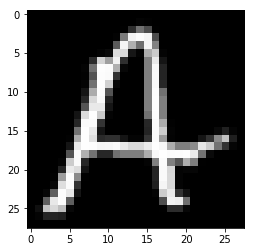

In [39]:
image_index = 4
plt.imshow(x_test[image_index].reshape(28, 28).T,cmap='gray')
pred = model.predict(x_test[image_index].reshape(1,28,28, 1))
print(pred.argmax())
print(labels[int(pred.argmax())])

In [28]:
p=model.predict(x_test)

In [31]:
print(p)

[[5.8056543e-16 9.8600543e-01 5.9851937e-09 ... 3.3230995e-06
  4.5291901e-05 2.4175349e-06]
 [5.2680181e-19 9.9998558e-01 3.1679929e-07 ... 3.5159022e-08
  7.2829167e-08 1.6554206e-09]
 [1.8870707e-18 9.9985731e-01 1.0398255e-12 ... 1.2972205e-11
  4.7494586e-09 1.5996577e-08]
 ...
 [2.3547082e-19 2.5538915e-08 1.0456743e-09 ... 3.8100567e-09
  2.9702109e-11 9.9974090e-01]
 [1.7657376e-18 2.3812494e-11 2.5963939e-11 ... 1.0891482e-09
  2.5717939e-06 9.9563497e-01]
 [1.8458020e-23 4.9555775e-13 2.9334708e-15 ... 1.3683402e-10
  1.3979899e-13 9.9998772e-01]]


In [33]:
c=0
for i in range(len(x_test)):
    c+=1 if np.argmax(p[i])==y_test[i] else 0
print(c)    
print((c/len(x_test))*100) 

19251
92.55288461538461
